## Mini project 6 - History Kaggle Demo: Airbnb New User Bookings

** This Week's Topic：Airbnb New User Bookings **

You can get the detailed information and download the data from the following link:<br/>
https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data

In [104]:
## Type your answers here ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import datetime as dt
import time
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [105]:
train = pd.read_csv('Desktop/DAL/train_users_2.csv', header=0)
test = pd.read_csv('Desktop/DAL/test_users.csv', header=0)
sessions = pd.read_csv('Desktop/DAL/sessions.csv', header=0)
agb = pd.read_csv('Desktop/DAL/age_gender_bkts.csv', header=0)
countries = pd.read_csv('Desktop/DAL/countries.csv', header=0)
print(train.shape)
print(test.shape)
print(sessions.shape)
print(agb.shape)
print(countries.shape)

(213451, 16)
(62096, 15)
(10567737, 6)
(420, 5)
(10, 7)


# 1.Data exploration

In [106]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [107]:
test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [108]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [109]:
agb.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [110]:
countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [112]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
id                         62096 non-null object
date_account_created       62096 non-null object
timestamp_first_active     62096 non-null int64
date_first_booking         0 non-null float64
gender                     62096 non-null object
age                        33220 non-null float64
signup_method              62096 non-null object
signup_flow                62096 non-null int64
language                   62096 non-null object
affiliate_channel          62096 non-null object
affiliate_provider         62096 non-null object
first_affiliate_tracked    62076 non-null object
signup_app                 62096 non-null object
first_device_type          62096 non-null object
first_browser              62096 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 7.1+ MB


## missing values

In [113]:
print ('training dataset ({} rows) null value:\n'.format(train.shape[0]))
print (train.isnull().sum())
print ('\n' + '***' * 10 + '\n')
print ('test dataset ({} rows) null value:\n'.format(test.shape[0]))
print (test.isnull().sum())

training dataset (213451 rows) null value:

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

******************************

test dataset (62096 rows) null value:

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel             

In [114]:
users = pd.concat((train, test), axis=0, ignore_index=True)

In [115]:
users.drop('id',axis=1, inplace=True)

In [116]:
users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,20091208061105


In [117]:
users.gender.replace('-unknown-', np.nan, inplace=True)

In [118]:
users_nan = (users.isnull().sum() / users.shape[0]) * 100
users_nan[users_nan > 0].drop('country_destination')

age                        42.412365
date_first_booking         67.733998
first_affiliate_tracked     2.208335
gender                     46.990169
dtype: float64

We have quite a lot of NaN in the age and gender wich will yield in lesser performance of the classifiers we will build. The feature date_first_booking has a 68% of NaN values because this feature is not present at the tests users, and therefore, we won't need it at the modeling part.

In [119]:
users.drop('date_first_booking',axis = 1, inplace = True)

The other feature with a high rate of *NaN* was `age`. Let's see:

In [120]:
users.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

There is some inconsistency in the age of some users as we can see above. It could be because the `age` inpout field was not sanitized or there was some mistakes handlig the data.

In [121]:
print(sum(users.age > 122))
print(sum(users.age < 18))

830
188


Let's take a look into thoes abnormal 'age'

In [122]:
users[users.age > 122]['age'].describe()

count     830.000000
mean     2002.620482
std        94.201344
min       132.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

It's seems that the weird values are caused by the appearance of 2014. I didn't figured why, but I supose that might be related with a wrong input being added with the new users.

In [123]:
users[users.age < 18]['age'].describe()

count    188.000000
mean      12.718085
std        5.764569
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

The young users seems to be under an acceptable range being the 50% of those users above 16 years old. We will need to hande the outliers. The simple thing that came to my mind it's to set an acceptance range and put those out of it to NaN.

In [124]:
users.loc[users.age > 95, 'age'] = np.nan
users.loc[users.age < 13, 'age'] = np.nan

## Visualizing the Data

In [24]:
ui_des = train['country_destination'].unique()
ui_des

array(['NDF', 'US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL',
       'DE', 'AU'], dtype=object)

contry destination


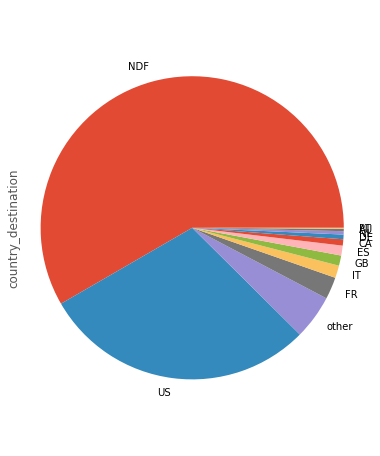

In [25]:
figure=plt.figure(figsize=(6,8))
train.country_destination.value_counts().plot.pie()
plt.axis('equal')
print('contry destination')

The first thing we can see that if there is a reservation, it's likely to be inside the US. But there is a 45% of people that never did a reservation.

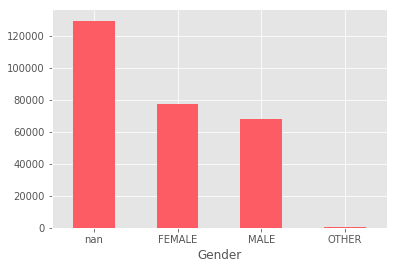

In [26]:
users.gender.value_counts(dropna=False).plot(kind='bar', color='#FD5C64', rot=0)
plt.xlabel('Gender')
sns.despine()

As we've seen before at this plot we can see the ammount of missing data in perspective. Also, notice that there is a slight difference between user gender.

Next thing it might be interesting to see if there is any gender preferences when travelling:

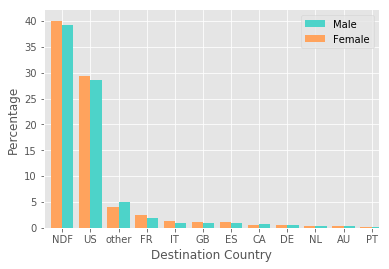

In [27]:
women = sum(users['gender'] == 'FEMALE')
men = sum(users['gender'] == 'MALE')

female_destinations = users.loc[users['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
male_destinations = users.loc[users['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100

# Bar width
width = 0.4

male_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='#FFA35D', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

There are no big differences between the 2 main genders, so this plot it's not really ussefull except to know the relative destination frecuency of the countries. Let's see it clear here:

Now that I know there is no difference between male and female reservations at first sight I'll dig into the age.

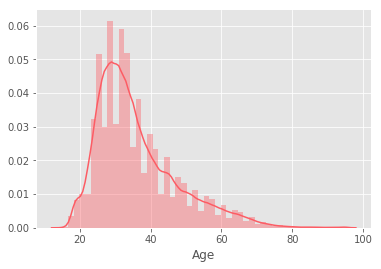

In [28]:
sns.distplot(users.age.dropna(), color='#FD5C64')
plt.xlabel('Age')
sns.despine()

As expected, the common age to travel is between 25 and 40. Let's see if, for example, older people travel in a different way. Let's pick an arbitrary age to split into two groups. Maybe 45?

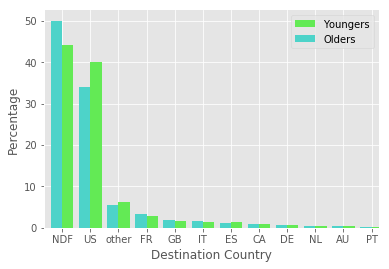

In [29]:
age = 45

younger = sum(users.loc[users['age'] < age, 'country_destination'].value_counts())
older = sum(users.loc[users['age'] > age, 'country_destination'].value_counts())

younger_destinations = users.loc[users['age'] < age, 'country_destination'].value_counts() / younger * 100
older_destinations = users.loc[users['age'] > age, 'country_destination'].value_counts() / older * 100

younger_destinations.plot(kind='bar', width=width, color='#63EA55', position=0, label='Youngers', rot=0)
older_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=1, label='Olders', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

We can see that the young people tends to stay in the US, and the older people choose to travel outside the country. Of vourse, there are no big differences between them and we must remember that we do not have the 42% of the ages.

The first thing I thought when reading the problem was the importance of the native lenguage when choosing the destination country. So let's see how manny users use english as main language:

In [30]:
print((sum(users.language == 'en') / users.shape[0])*100)

96.3675888323952


With the 96% of users using English as their language, it is understandable that a lot of people stay in the US. Someone maybe thinking, if the language is important, why not travel to GB? We need to remember that there is also a lot of factor we are not acounting so making assumpions or predictions like that might be dangerous.

To see the dates of our users and the timespan of them, let's plot the number of accounts created by time:

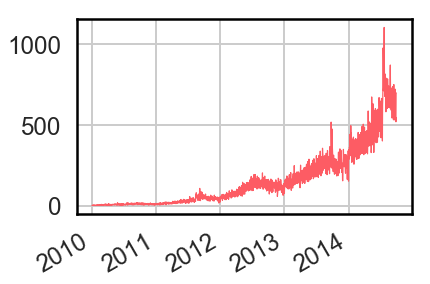

In [31]:
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=1.1)
users.date_account_created.value_counts().plot(kind='line', linewidth=1.2, color='#FD5C64')

It's appreciable how fast Airbnb has grown over the last 3 years. Does this correlate with the date when the user was active for the first time? It should be very similar, so doing this is a way to check the data!

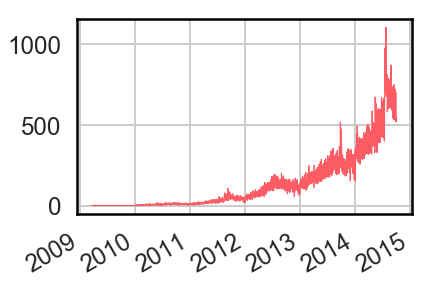

In [32]:
users.date_first_active.value_counts().plot(kind='line', linewidth=1.2, color='#FD5C64')

We can se that's almost the same as date_account_created, and also, notice the small peaks. We can, either smooth the graph or dig into those peaks. Let's dig in:

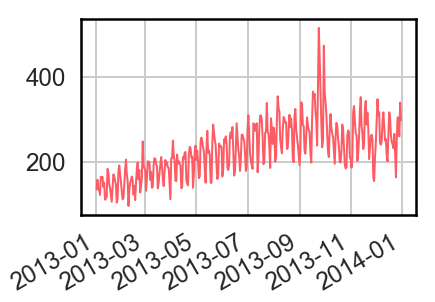

In [33]:
users_2013 = users[users['date_first_active'] > pd.to_datetime(20130101, format='%Y%m%d')]
users_2013 = users_2013[users_2013['date_first_active'] < pd.to_datetime(20140101, format='%Y%m%d')]
users_2013.date_first_active.value_counts().plot(kind='line', linewidth=2, color='#FD5C64')
plt.show()

At first sight we can see a small pattern, there are some peaks at the same distance. Looking more closely:

In [34]:
weekdays = []
for date in users.date_account_created:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)

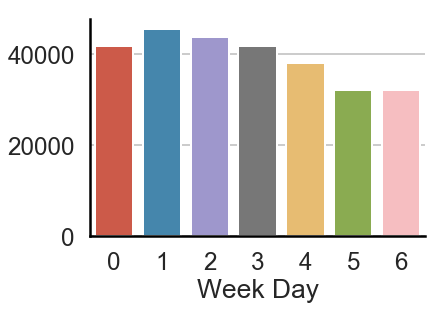

In [35]:
sns.barplot(x = weekdays.value_counts().index, y=weekdays.value_counts().values, order=range(0,7))
plt.xlabel('Week Day')
sns.despine()

The local minimums where the Sundays(where the people use less the Internet), and it's usually to hit a maximum at Tuesdays!

The last date related plot I want to see is the next:

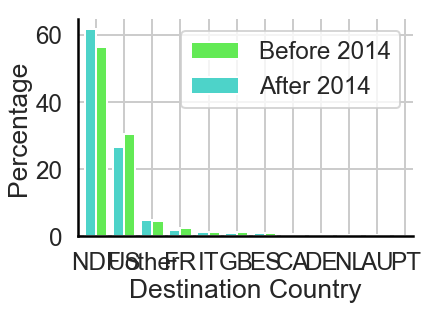

In [36]:
date = pd.to_datetime(20140101, format='%Y%m%d')

before = sum(users.loc[users['date_first_active'] < date, 'country_destination'].value_counts())
after = sum(users.loc[users['date_first_active'] > date, 'country_destination'].value_counts())
before_destinations = users.loc[users['date_first_active'] < date, 
                                'country_destination'].value_counts() / before * 100
after_destinations = users.loc[users['date_first_active'] > date, 
                               'country_destination'].value_counts() / after * 100
before_destinations.plot(kind='bar', width=width, color='#63EA55', position=0, label='Before 2014', rot=0)
after_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=1, label='After 2014', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

It's a clean comparision of usual destinations then and now, where we can see how the new users, register more and book less, and when they book they stay at the US.

# 2. Feature Engineering

In [144]:
train_row = train.shape[0]
# The label we need to predict
labels = train['country_destination'].values

# the id number is not useful for prediction. We need it for submission
id_test = test['id']

## the date time data

date_account_created （dac）

In [145]:
# create year, month, day feature for dac
dac = pd.to_datetime(users.date_account_created)
users['dac_year'] = np.array([x.year for x in dac])
users['dac_month'] = np.array([x.month for x in dac])
users['dac_day'] = np.array([x.day for x in dac])

In [146]:
# create features of weekday for dac, showing Monday to Sunday
users['dac_wd'] = np.array([x.isoweekday() for x in dac])
df_dac_wd = pd.get_dummies(users.dac_wd, prefix = 'dac_wd')
users = pd.concat((users, df_dac_wd), axis = 1)
users.drop(['dac_wd'], axis = 1, inplace = True)

In [147]:
def get_season(dt):
    dt = dt.date()
    # dt must be a datetime type
    if dt.month in [3,4,5]:
        return 'Spring'    
    elif dt.month in [6,7,8]:
        return 'Summer'    
    elif dt.month in [9,10,11]:
        return 'Fall'   
    else:
        return 'Winter' 

In [148]:
# create season features from dac
users['dac_season'] = np.array([get_season(x) for x in dac])
df_dac_season = pd.get_dummies(users.dac_season, prefix = 'dac_season')
users = pd.concat((users, df_dac_season), axis = 1)
users.drop(['dac_season'], axis = 1, inplace = True)

timestamp_first_active (tfa)

In [149]:
import datetime
tfa = users.timestamp_first_active.astype(str).apply(lambda x: datetime.datetime(int(x[:4]),
                                                                          int(x[4:6]), 
                                                                          int(x[6:8]),
                                                                          int(x[8:10]),
                                                                          int(x[10:12]),
                                                                          int(x[12:])))

In [150]:
# create tfa_year, tfa_month, tfa_day feature
users['tfa_year'] = np.array([x.year for x in tfa])
users['tfa_month'] = np.array([x.month for x in tfa])
users['tfa_day'] = np.array([x.day for x in tfa])

In [151]:
# create features of weekday
users['tfa_wd'] = np.array([x.isoweekday() for x in tfa])
df_tfa_wd = pd.get_dummies(users.tfa_wd, prefix = 'tfa_wd')
users = pd.concat((users, df_tfa_wd), axis = 1)
users.drop(['tfa_wd'], axis = 1, inplace = True)

In [152]:
# create season features from tfa
users['tfa_season'] = np.array([get_season(x) for x in tfa])
df_tfa_season = pd.get_dummies(users.tfa_season, prefix = 'tfa_season')
users = pd.concat((users, df_tfa_season), axis = 1)
users.drop(['tfa_season'], axis = 1, inplace = True)

Time span between dac and tfa can also be used as a feature.

In [153]:
dt_span = (dac - tfa).dt.seconds
users['dt_span'] = np.array([x for x in dt_span])

## Deal with Age

In [154]:
users.isnull().sum()[users.isnull().sum()>0]

age                        119722
country_destination         62096
first_affiliate_tracked      6085
gender                     129480
dtype: int64

In [155]:
age = users['age']
age.fillna(-1, inplace = True)

In [156]:
## Keeping ages in 14 < age < 106 as OK
interval = 15

def get_age(age):
    # age is a float number   
    if age < 0:
        return 'NA'
    elif (age < interval):
        return interval
    elif (age <= interval * 2):
        return interval*2
    elif (age <= interval * 3):
        return interval * 3
    elif (age <= interval * 4):
        return interval * 4
    elif (age <= interval * 5):
        return interval * 5
    elif (age <= interval * 6):
        return interval * 6
    elif (age <= interval * 7):
        return interval * 7
    else:
        return 'Unphysical'

In [157]:
users['age'] = np.array([get_age(x) for x in age])
df_age = pd.get_dummies(users.age, prefix = 'age')

In [158]:
users = pd.concat((users, df_age), axis = 1)

# Deal with the session data

In [159]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [160]:
#Filling nan with specific value ('NAN')
sessions.action = sessions.action.fillna('NAN')
sessions.action_type = sessions.action_type.fillna('NAN')
sessions.action_detail = sessions.action_detail.fillna('NAN')
sessions.device_type = sessions.device_type.fillna('NAN')

In [161]:
#Action values with low frequency are changed to 'OTHER'
act_freq = 100  #Threshold for frequency
act = dict(zip(*np.unique(sessions.action, return_counts=True)))
sessions.action = sessions.action.apply(lambda x: 'OTHER' if act[x] < act_freq else x)

In [162]:
#Computing value_counts. These are going to be used in the one-hot encoding
#based feature generation (following loop).
f_act = sessions.action.value_counts().argsort()
f_act_detail = sessions.action_detail.value_counts().argsort()
f_act_type = sessions.action_type.value_counts().argsort()
f_dev_type = sessions.device_type.value_counts().argsort()

In [163]:
dgr_sess = sessions.groupby('user_id')

In [164]:
dgr_sess

In [58]:
sessions[sessions['user_id'] =='00023iyk9l']

,user_id,action,action_type,action_detail,device_type,secs_elapsed
3573923,00023iyk9l,index,view,view_search_results,Mac Desktop,20438.0
3573924,00023iyk9l,dashboard,view,dashboard,Mac Desktop,787.0
3573925,00023iyk9l,header_userpic,data,header_userpic,Mac Desktop,850.0
3573926,00023iyk9l,dashboard,view,dashboard,Mac Desktop,934.0
3573927,00023iyk9l,callback,partner_callback,oauth_response,Mac Desktop,NaN
3573928,00023iyk9l,NAN,message_post,message_post,Mac Desktop,129817.0
3573929,00023iyk9l,pending,booking_request,pending,Mac Desktop,0.0
3573930,00023iyk9l,requested,view,p5,Mac Desktop,1904.0
3573931,00023iyk9l,requested,view,p5,Mac Desktop,1618.0
3573932,00023iyk9l,requested,view,p5,Mac Desktop,32081.0


In [59]:
for g in dgr_sess:
    print(g[0])
    x = g[1]
    break
x

00023iyk9l


,user_id,action,action_type,action_detail,device_type,secs_elapsed
3573923,00023iyk9l,index,view,view_search_results,Mac Desktop,20438.0
3573924,00023iyk9l,dashboard,view,dashboard,Mac Desktop,787.0
3573925,00023iyk9l,header_userpic,data,header_userpic,Mac Desktop,850.0
3573926,00023iyk9l,dashboard,view,dashboard,Mac Desktop,934.0
3573927,00023iyk9l,callback,partner_callback,oauth_response,Mac Desktop,NaN
3573928,00023iyk9l,NAN,message_post,message_post,Mac Desktop,129817.0
3573929,00023iyk9l,pending,booking_request,pending,Mac Desktop,0.0
3573930,00023iyk9l,requested,view,p5,Mac Desktop,1904.0
3573931,00023iyk9l,requested,view,p5,Mac Desktop,1618.0
3573932,00023iyk9l,requested,view,p5,Mac Desktop,32081.0


## Label Encoding and One Hot Encoding

In [126]:
pd.set_option('display.max_columns', None) 
users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,untracked,Chrome,Mac Desktop,NaN,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,untracked,Chrome,Mac Desktop,NaN,en,Web,0,basic,20091208061105


In [127]:
feature_OHE = ['gender', 
               'signup_method', 
               'signup_flow', 
               'language', 
               'affiliate_channel', 
               'affiliate_provider', 
               'first_affiliate_tracked', 
               'signup_app', 
               'first_device_type', 
               'first_browser']

### Label Encoding:

In [131]:
from sklearn import preprocessing
LBL = preprocessing.LabelEncoder()

LE_vars=[]
LE_map=dict()
LE_map1=dict()
for cat_var in feature_OHE:
    print ("Label Encoding %s" % (cat_var))
    LE_var=cat_var+'_le'
    users[LE_var]=LBL.fit_transform(users[cat_var].fillna('none'))
    LE_vars.append(LE_var)
    LE_map1[cat_var]=dict(zip(LBL.classes_, LBL.transform(LBL.classes_))) 
    LE_map[cat_var]=LBL.classes_
print ("Label-encoded feaures: %s" % (LE_vars))

Label Encoding gender
Label Encoding signup_method
Label Encoding signup_flow
Label Encoding language
Label Encoding affiliate_channel
Label Encoding affiliate_provider
Label Encoding first_affiliate_tracked
Label Encoding signup_app
Label Encoding first_device_type
Label Encoding first_browser
Label-encoded feaures: ['gender_le', 'signup_method_le', 'signup_flow_le', 'language_le', 'affiliate_channel_le', 'affiliate_provider_le', 'first_affiliate_tracked_le', 'signup_app_le', 'first_device_type_le', 'first_browser_le']


In [132]:
LE_map1

{'gender': {'FEMALE': 0, 'MALE': 1, 'OTHER': 2, 'none': 3},
 'signup_method': {'basic': 0, 'facebook': 1, 'google': 2, 'weibo': 3},
 'signup_flow': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  8: 7,
  10: 8,
  12: 9,
  14: 10,
  15: 11,
  16: 12,
  20: 13,
  21: 14,
  23: 15,
  24: 16,
  25: 17},
 'language': {'-unknown-': 0,
  'ca': 1,
  'cs': 2,
  'da': 3,
  'de': 4,
  'el': 5,
  'en': 6,
  'es': 7,
  'fi': 8,
  'fr': 9,
  'hr': 10,
  'hu': 11,
  'id': 12,
  'is': 13,
  'it': 14,
  'ja': 15,
  'ko': 16,
  'nl': 17,
  'no': 18,
  'pl': 19,
  'pt': 20,
  'ru': 21,
  'sv': 22,
  'th': 23,
  'tr': 24,
  'zh': 25},
 'affiliate_channel': {'api': 0,
  'content': 1,
  'direct': 2,
  'other': 3,
  'remarketing': 4,
  'sem-brand': 5,
  'sem-non-brand': 6,
  'seo': 7},
 'affiliate_provider': {'baidu': 0,
  'bing': 1,
  'craigslist': 2,
  'daum': 3,
  'direct': 4,
  'email-marketing': 5,
  'facebook': 6,
  'facebook-open-graph': 7,
  'google': 8,
  'gsp': 9,
  'meetup': 10,
  'naver'

In [205]:
LE_map

{'gender': array(['FEMALE', 'MALE', 'OTHER', 'none'], dtype=object),
 'signup_method': array(['basic', 'facebook', 'google', 'weibo'], dtype=object),
 'signup_flow': array([ 0,  1,  2,  3,  4,  5,  6,  8, 10, 12, 14, 15, 16, 20, 21, 23, 24,
        25], dtype=int64),
 'language': array(['-unknown-', 'ca', 'cs', 'da', 'de', 'el', 'en', 'es', 'fi', 'fr',
        'hr', 'hu', 'id', 'is', 'it', 'ja', 'ko', 'nl', 'no', 'pl', 'pt',
        'ru', 'sv', 'th', 'tr', 'zh'], dtype=object),
 'affiliate_channel': array(['api', 'content', 'direct', 'other', 'remarketing', 'sem-brand',
        'sem-non-brand', 'seo'], dtype=object),
 'affiliate_provider': array(['baidu', 'bing', 'craigslist', 'daum', 'direct', 'email-marketing',
        'facebook', 'facebook-open-graph', 'google', 'gsp', 'meetup',
        'naver', 'other', 'padmapper', 'vast', 'wayn', 'yahoo', 'yandex'],
       dtype=object),
 'first_affiliate_tracked': array(['linked', 'local ops', 'marketing', 'none', 'omg', 'product',
        'trac

### One Hot Encoding:

In [133]:
OHE = preprocessing.OneHotEncoder(sparse=False)
start=time.time()
OHE.fit(users[LE_vars])
OHE_data=OHE.transform(users[LE_vars])
                                   
print ('One-hot-encoding finished in %f seconds' % (time.time()-start))


OHE_vars = [var[:-3] + '_' + str(level).replace(' ','_')\
                for var in feature_OHE for level in LE_map[var]]

print ("OHE size :" ,OHE_data.shape)
print ("One-hot encoded catgorical feature samples : %s" % (OHE_vars[:100]))

One-hot-encoding finished in 1.239231 seconds
OHE size : (275547, 154)
One-hot encoded catgorical feature samples : ['gen_FEMALE', 'gen_MALE', 'gen_OTHER', 'gen_none', 'signup_met_basic', 'signup_met_facebook', 'signup_met_google', 'signup_met_weibo', 'signup_f_0', 'signup_f_1', 'signup_f_2', 'signup_f_3', 'signup_f_4', 'signup_f_5', 'signup_f_6', 'signup_f_8', 'signup_f_10', 'signup_f_12', 'signup_f_14', 'signup_f_15', 'signup_f_16', 'signup_f_20', 'signup_f_21', 'signup_f_23', 'signup_f_24', 'signup_f_25', 'langu_-unknown-', 'langu_ca', 'langu_cs', 'langu_da', 'langu_de', 'langu_el', 'langu_en', 'langu_es', 'langu_fi', 'langu_fr', 'langu_hr', 'langu_hu', 'langu_id', 'langu_is', 'langu_it', 'langu_ja', 'langu_ko', 'langu_nl', 'langu_no', 'langu_pl', 'langu_pt', 'langu_ru', 'langu_sv', 'langu_th', 'langu_tr', 'langu_zh', 'affiliate_chan_api', 'affiliate_chan_content', 'affiliate_chan_direct', 'affiliate_chan_other', 'affiliate_chan_remarketing', 'affiliate_chan_sem-brand', 'affiliate_c

In [134]:
users = pd.concat((users, pd.DataFrame(OHE_data,columns=OHE_vars)), axis = 1)

In [166]:
users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active,gender_le,signup_method_le,signup_flow_le,language_le,affiliate_channel_le,affiliate_provider_le,first_affiliate_tracked_le,signup_app_le,first_device_type_le,first_browser_le,gen_FEMALE,gen_MALE,gen_OTHER,gen_none,signup_met_basic,signup_met_facebook,signup_met_google,signup_met_weibo,signup_f_0,signup_f_1,signup_f_2,signup_f_3,signup_f_4,signup_f_5,signup_f_6,signup_f_8,signup_f_10,signup_f_12,signup_f_14,signup_f_15,signup_f_16,signup_f_20,signup_f_21,signup_f_23,signup_f_24,signup_f_25,langu_-unknown-,langu_ca,langu_cs,langu_da,langu_de,langu_el,langu_en,langu_es,langu_fi,langu_fr,langu_hr,langu_hu,langu_id,langu_is,langu_it,langu_ja,langu_ko,langu_nl,langu_no,langu_pl,langu_pt,langu_ru,langu_sv,langu_th,langu_tr,langu_zh,affiliate_chan_api,affiliate_chan_content,affiliate_chan_direct,affiliate_chan_other,affiliate_chan_remarketing,affiliate_chan_sem-brand,affiliate_chan_sem-non-brand,affiliate_chan_seo,affiliate_provi_baidu,affiliate_provi_bing,affiliate_provi_craigslist,affiliate_provi_daum,affiliate_provi_direct,affiliate_provi_email-marketing,affiliate_provi_facebook,affiliate_provi_facebook-open-graph,affiliate_provi_google,affiliate_provi_gsp,affiliate_provi_meetup,affiliate_provi_naver,affiliate_provi_other,affiliate_provi_padmapper,affiliate_provi_vast,affiliate_provi_wayn,affiliate_provi_yahoo,affiliate_provi_yandex,first_affiliate_trac_linked,first_affiliate_trac_local_ops,first_affiliate_trac_marketing,first_affiliate_trac_none,first_affiliate_trac_omg,first_affiliate_trac_product,first_affiliate_trac_tracked-other,first_affiliate_trac_untracked,signup__Android,signup__Moweb,signup__Web,signup__iOS,first_device_t_Android_Phone,first_device_t_Android_Tablet,first_device_t_Desktop_(Other),first_device_t_Mac_Desktop,first_device_t_Other/Unknown,first_device_t_SmartPhone_(Other),first_device_t_Windows_Desktop,first_device_t_iPad,first_device_t_iPhone,first_brow_-unknown-,first_brow_AOL_Explorer,first_brow_Android_Browser,first_brow_Apple_Mail,first_brow_Arora,first_brow_Avant_Browser,first_brow_BlackBerry_Browser,first_brow_Camino,first_brow_Chrome,first_brow_Chrome_Mobile,first_brow_Chromium,first_brow_CometBird,first_brow_Comodo_Dragon,first_brow_Conkeror,first_brow_CoolNovo,first_brow_Crazy_Browser,first_brow_Epic,first_brow_Firefox,first_brow_Flock,first_brow_Google_Earth,first_brow_Googlebot,first_brow_IBrowse,first_brow_IE,first_brow_IE_Mobile,first_brow_IceDragon,first_brow_IceWeasel,first_brow_Iron,first_brow_Kindle_Browser,first_brow_Maxthon,first_brow_Mobile_Firefox,first_brow_Mobile_Safari,first_brow_Mozilla,first_brow_NetNewsWire,first_brow_Nintendo_Browser,first_brow_OmniWeb,first_brow_Opera,first_brow_Opera_Mini,first_brow_Opera_Mobile,first_brow_Outlook_2007,first_brow_PS_Vita_browser,first_brow_Pale_Moon,first_brow_Palm_Pre_web_browser,first_brow_RockMelt,first_brow_Safari,first_brow_SeaMonkey,first_brow_Silk,first_brow_SiteKiosk,first_brow_SlimBrowser,first_brow_Sogou_Explorer,first_brow_Stainless,first_brow_TenFourFox,first_brow_TheWorld_Browser,first_brow_UC_Browser,first_brow_Yandex.Browser,first_brow_wOSBrowser,date_first_active,dac_year,dac_month,dac_day,dac_wd_1,dac_wd_2,dac_wd_3,dac_wd_4,dac_wd_5,dac_wd_6,dac_wd_7,dac_season_Fall,dac_season_Spring,dac_season_Summer,dac_season_Winter,tfa_year,tfa_month,tfa_day,tfa_wd_1,tfa_wd_2,tfa_wd_3,tfa_wd_4,tfa_wd_5,tfa_wd_6,tfa_wd_7,tfa_season_Fall,tfa_season_Spring,tfa_season_Summer,tfa_season_Winter,dt_span,age_105,age_30,age_45,age_60,age_75,age_90,age_NA
0,direct,direct,NA,NDF,2010-06-28,untracked,Chrome,Mac Desktop,NaN,en,Web,0,facebook,20090319043255,3,1,0,6,2,4,7,2,3,8,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [167]:
users.shape

(275547, 215)

# Model Building

### Airbnb Evaluation: NDCG

In [136]:
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelBinarizer

def dcg_score(y_true, y_score, k=5):
    
    """
    y_true : array, shape = [n_samples]
        Ground truth (true relevance labels).
    y_score : array, shape = [n_samples, n_classes]
        Predicted scores.
    k : int
    """
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])

    gain = 2 ** y_true - 1

    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)


def ndcg_score(ground_truth, predictions, k=5):
    
    """
    Parameters
    ----------
    ground_truth : array, shape = [n_samples]
        Ground truth (true labels represended as integers).
    predictions : array, shape = [n_samples, n_classes]
        Predicted probabilities.
    k : int
        Rank.
        
    Example
    -------
    >>> ground_truth = [1, 0, 2]
    >>> predictions = [[0.15, 0.55, 0.2], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    >>> score = ndcg_score(ground_truth, predictions, k=2)
    1.0
    >>> predictions = [[0.9, 0.5, 0.8], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    >>> score = ndcg_score(ground_truth, predictions, k=2)
    0.6666666666
    """
    lb = LabelBinarizer()
    lb.fit(range(len(predictions) + 1))
    T = lb.transform(ground_truth)

    scores = []

    # Iterate over each y_true and compute the DCG score
    for y_true, y_score in zip(T, predictions):
        actual = dcg_score(y_true, y_score, k)
        best = dcg_score(y_true, y_true, k)
        score = float(actual) / float(best)
        scores.append(score)

    return np.mean(scores)

In [137]:
labels_le = preprocessing.LabelEncoder()
ytrain = labels_le.fit_transform(labels)
label_map = dict(zip(labels_le.classes_, labels_le.transform(labels_le.classes_)))

In [138]:
label_map

{'AU': 0,
 'CA': 1,
 'DE': 2,
 'ES': 3,
 'FR': 4,
 'GB': 5,
 'IT': 6,
 'NDF': 7,
 'NL': 8,
 'PT': 9,
 'US': 10,
 'other': 11}

In [168]:
ytrain

array([ 7,  7, 10, ...,  7,  7,  7], dtype=int64)

### Random Forest

In [179]:
xtrain = users.drop(['age','date_account_created','timestamp_first_active', 'country_destination','date_first_active'],axis=1).drop(feature_OHE+LE_vars,axis=1)[:train.shape[0]]
xtest = users.drop(['age','date_account_created','timestamp_first_active','country_destination','date_first_active'],axis=1).drop(feature_OHE+LE_vars,axis=1)[train.shape[0]:]

In [180]:
xtrain.head()

,gen_FEMALE,gen_MALE,gen_OTHER,gen_none,signup_met_basic,signup_met_facebook,signup_met_google,signup_met_weibo,signup_f_0,signup_f_1,signup_f_2,signup_f_3,signup_f_4,signup_f_5,signup_f_6,signup_f_8,signup_f_10,signup_f_12,signup_f_14,signup_f_15,signup_f_16,signup_f_20,signup_f_21,signup_f_23,signup_f_24,signup_f_25,langu_-unknown-,langu_ca,langu_cs,langu_da,langu_de,langu_el,langu_en,langu_es,langu_fi,langu_fr,langu_hr,langu_hu,langu_id,langu_is,langu_it,langu_ja,langu_ko,langu_nl,langu_no,langu_pl,langu_pt,langu_ru,langu_sv,langu_th,langu_tr,langu_zh,affiliate_chan_api,affiliate_chan_content,affiliate_chan_direct,affiliate_chan_other,affiliate_chan_remarketing,affiliate_chan_sem-brand,affiliate_chan_sem-non-brand,affiliate_chan_seo,affiliate_provi_baidu,affiliate_provi_bing,affiliate_provi_craigslist,affiliate_provi_daum,affiliate_provi_direct,affiliate_provi_email-marketing,affiliate_provi_facebook,affiliate_provi_facebook-open-graph,affiliate_provi_google,affiliate_provi_gsp,affiliate_provi_meetup,affiliate_provi_naver,affiliate_provi_other,affiliate_provi_padmapper,affiliate_provi_vast,affiliate_provi_wayn,affiliate_provi_yahoo,affiliate_provi_yandex,first_affiliate_trac_linked,first_affiliate_trac_local_ops,first_affiliate_trac_marketing,first_affiliate_trac_none,first_affiliate_trac_omg,first_affiliate_trac_product,first_affiliate_trac_tracked-other,first_affiliate_trac_untracked,signup__Android,signup__Moweb,signup__Web,signup__iOS,first_device_t_Android_Phone,first_device_t_Android_Tablet,first_device_t_Desktop_(Other),first_device_t_Mac_Desktop,first_device_t_Other/Unknown,first_device_t_SmartPhone_(Other),first_device_t_Windows_Desktop,first_device_t_iPad,first_device_t_iPhone,first_brow_-unknown-,first_brow_AOL_Explorer,first_brow_Android_Browser,first_brow_Apple_Mail,first_brow_Arora,first_brow_Avant_Browser,first_brow_BlackBerry_Browser,first_brow_Camino,first_brow_Chrome,first_brow_Chrome_Mobile,first_brow_Chromium,first_brow_CometBird,first_brow_Comodo_Dragon,first_brow_Conkeror,first_brow_CoolNovo,first_brow_Crazy_Browser,first_brow_Epic,first_brow_Firefox,first_brow_Flock,first_brow_Google_Earth,first_brow_Googlebot,first_brow_IBrowse,first_brow_IE,first_brow_IE_Mobile,first_brow_IceDragon,first_brow_IceWeasel,first_brow_Iron,first_brow_Kindle_Browser,first_brow_Maxthon,first_brow_Mobile_Firefox,first_brow_Mobile_Safari,first_brow_Mozilla,first_brow_NetNewsWire,first_brow_Nintendo_Browser,first_brow_OmniWeb,first_brow_Opera,first_brow_Opera_Mini,first_brow_Opera_Mobile,first_brow_Outlook_2007,first_brow_PS_Vita_browser,first_brow_Pale_Moon,first_brow_Palm_Pre_web_browser,first_brow_RockMelt,first_brow_Safari,first_brow_SeaMonkey,first_brow_Silk,first_brow_SiteKiosk,first_brow_SlimBrowser,first_brow_Sogou_Explorer,first_brow_Stainless,first_brow_TenFourFox,first_brow_TheWorld_Browser,first_brow_UC_Browser,first_brow_Yandex.Browser,first_brow_wOSBrowser,dac_year,dac_month,dac_day,dac_wd_1,dac_wd_2,dac_wd_3,dac_wd_4,dac_wd_5,dac_wd_6,dac_wd_7,dac_season_Fall,dac_season_Spring,dac_season_Summer,dac_season_Winter,tfa_year,tfa_month,tfa_day,tfa_wd_1,tfa_wd_2,tfa_wd_3,tfa_wd_4,tfa_wd_5,tfa_wd_6,tfa_wd_7,tfa_season_Fall,tfa_season_Spring,tfa_season_Summer,tfa_season_Winter,dt_span,age_105,age_30,age_45,age_60,age_75,age_90,age_NA
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,6,28,1,0,0,0,0,0,0,0,0,1,0,2009,3,19,0,0,0,1,0,0,0,0,1,0,0,70025,0,0,0,0,0,

In [181]:
xtrain.shape

(213451, 190)

In [182]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Columns: 190 entries, gen_FEMALE to age_NA
dtypes: float64(154), int32(7), uint8(29)
memory usage: 262.4 MB


In [183]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [184]:
N_ESTIMATORS = 50
RANDOM_STATE = 2017
MAX_DEPTH = 9
RF = RandomForestClassifier(n_estimators=N_ESTIMATORS,
                                 max_depth=MAX_DEPTH,
                                 random_state=RANDOM_STATE)

In [185]:
RF.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=2017, verbose=0,
            warm_start=False)

In [187]:
predict = RF.predict_proba(xtrain)

In [202]:
predict

array([[1.63189578e-03, 7.41266687e-03, 5.24917647e-03, ...,
        6.95324486e-04, 2.74104214e-01, 3.92765969e-02],
       [2.60384605e-03, 8.07347474e-03, 8.05532728e-03, ...,
        1.07254636e-03, 3.86913377e-01, 5.15203392e-02],
       [5.32511648e-03, 1.24253491e-02, 8.10214208e-03, ...,
        2.25844414e-03, 4.78333005e-01, 6.75555256e-02],
       ...,
       [3.16743739e-03, 1.12846746e-02, 6.73164196e-03, ...,
        1.50862366e-03, 4.30179644e-01, 6.66515605e-02],
       [6.63800648e-04, 1.85114517e-03, 1.29135866e-03, ...,
        3.47921886e-04, 1.18339655e-01, 2.26950293e-02],
       [5.87638496e-04, 1.50105452e-03, 1.17887139e-03, ...,
        4.76259017e-04, 9.61121386e-02, 1.77822709e-02]])

In [189]:
predict[1]

array([0.00260385, 0.00807347, 0.00805533, 0.01289507, 0.03197609,
       0.0125212 , 0.01394479, 0.46614446, 0.00427948, 0.00107255,
       0.38691338, 0.05152034])

In [188]:
np.argsort(predict[1])

array([ 9,  0,  8,  2,  1,  5,  3,  6,  4, 11, 10,  7], dtype=int64)

In [204]:
labels_le.inverse_transform(np.argsort(predict[1])[::-1])

array(['NDF', 'US', 'other', 'FR', 'IT', 'ES', 'GB', 'CA', 'DE', 'NL',
       'AU', 'PT'], dtype=object)

In [190]:
k_ndcg = 5
train_ndcg_score = ndcg_score(ytrain[:1000], predict[:1000], k = k_ndcg)
train_ndcg_score

0.8060346895694436

In [198]:
id_test = test['id']

#Taking the 5 classes with highest probabilities
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 5
    cts += labels_le.inverse_transform(np.argsort(predict[i])[::-1])[:5].tolist()

#Generate submission
sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
sub.to_csv('sub.csv',index=False)

In [199]:
sub

,id,country
0,5uwns89zht,NDF
1,5uwns89zht,US
2,5uwns89zht,other
3,5uwns89zht,FR
4,5uwns89zht,ES
5,jtl0dijy2j,NDF
6,jtl0dijy2j,US
7,jtl0dijy2j,other
8,jtl0dijy2j,FR
9,jtl0dijy2j,IT
